In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.mkdir('generated')
os.mkdir('test_generated')

In [4]:
kaggle_datasets = [
  "splcher/animefacedataset",
  "soumikrakshit/anime-faces",
  "scribbless/another-anime-face-dataset"
]

In [5]:
# Get the Kaggle username and API key
import getpass
import os

username = getpass.getpass("Your kaggle username: ")
api_key = getpass.getpass("Your kaggle API Key: ")

os.environ["KAGGLE_USERNAME"] = username
os.environ["KAGGLE_KEY"] = api_key

Your kaggle username: ··········
Your kaggle API Key: ··········


In [6]:
# The API command to download a dataset is:
# `kaggle datasets download -d <dataset>`

# Downloading the datasets
import subprocess


def download_kaggle_dataset(dataset):
  result = subprocess.run(["kaggle", "datasets", "download", "-d", dataset], capture_output=True, text=True)
  print("stdout:", result.stdout)
  print("stderr:", result.stderr)


for dataset in kaggle_datasets:
  download_kaggle_dataset(dataset)

stdout: Downloading animefacedataset.zip to /content


stderr: 
  0%|          | 0.00/395M [00:00<?, ?B/s]
  1%|▏         | 5.00M/395M [00:00<00:10, 40.4MB/s]
  2%|▏         | 9.00M/395M [00:00<00:26, 15.2MB/s]
 10%|█         | 41.0M/395M [00:00<00:04, 78.6MB/s]
 15%|█▍        | 58.0M/395M [00:00<00:03, 101MB/s] 
 20%|██        | 79.0M/395M [00:00<00:02, 129MB/s]
 24%|██▍       | 96.0M/395M [00:01<00:02, 123MB/s]
 29%|██▊       | 113M/395M [00:01<00:02, 129MB/s] 
 35%|███▍      | 137M/395M [00:01<00:02, 111MB/s]
 38%|███▊      | 150M/395M [00:01<00:02, 89.7MB/s]
 45%|████▍     | 177M/395M [00:01<00:02, 113MB/s] 
 51%|█████     | 201M/395M [00:02<00:01, 117MB/s]
 57%|█████▋    | 225M/395M [00:02<00:01, 142MB/s]
 61%|██████    | 241M/395M [00:02<00:01, 146MB/s]
 67%|██████▋   | 263M/395M [00:02<00:00, 165MB/s]
 71%|███████   | 281M/395M [00:02<00:00, 164MB/s]
 76%|███████▌  | 298M/395M [00:02<00:00, 151MB/s]
 82%|████████▏ | 323M/395M [00:02<00:00, 176MB/s]
 86%|████████▋ | 341M/395M [00

In [7]:
# Unzip the datasets
import zipfile


def unzip(dataset):
  filename = dataset.split("/")[1]
  with zipfile.ZipFile(filename + ".zip", 'r') as zip_ref:
    zip_ref.extractall(filename)


for dataset in kaggle_datasets:
  unzip(dataset)

In [8]:
# import shutil
# import os

# TARGET = "./dataset"

# if not os.path.exists(TARGET):
#   os.makedirs(TARGET)

 
# def move(source_dir, target_dir):
#   file_names = os.listdir(source_dir)
    
#   for file_name in file_names:
#     shutil.move(os.path.join(source_dir, file_name), target_dir)


# paths = [
#   "./anime-faces/data",
#   "./animefacedataset/images",
#   "./another-anime-face-dataset/animefaces256cleaner"
# ]

# for path in paths:
#   move(path, TARGET)

# # Get the count of file
# print(len(os.listdir(TARGET)))

In [9]:
!pip install opendatasets
!pip install torchmetrics
!pip install torch_fidelity
!pip install torchmetrics[image]
!pip install pytorch-ignite
!pip install pytorch-fid-wrapper
!pip install pytorch-ignite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 512 kB 6.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 264 kB 7.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import torch
_ = torch.manual_seed(123)
from torchmetrics.image.fid import FrechetInceptionDistance
fid = FrechetInceptionDistance(feature=64)

Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth


  0%|          | 0.00/91.2M [00:00<?, ?B/s]

In [12]:
import os

DATA_DIR = 'animefacedataset'

# Get all the files downloaded
print(os.listdir(DATA_DIR))

['images']


In [13]:
print(os.listdir(f"{DATA_DIR}/images")[:5])

['55506_2016.jpg', '54345_2016.jpg', '50131_2015.jpg', '61550_2018.jpg', '20128_2007.jpg']


In [14]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

# Important variables.
image_size = 64
batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

# Loading the data.
train_ds = ImageFolder(
    DATA_DIR,
    transform=T.Compose([
      T.Resize(image_size),
      T.CenterCrop(image_size),
      T.ToTensor(),
      T.Normalize(*stats)
    ])
)

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [15]:
train_ds

Dataset ImageFolder
    Number of datapoints: 63565
    Root location: animefacedataset
    StandardTransform
Transform: Compose(
               Resize(size=64, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(64, 64))
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [16]:
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid
import os

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

%matplotlib inline

In [17]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))

    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

# Using show_images, Display a batch of the training images
def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

# Denormalization script for the image grid, which is stored in the form of a tensor.
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

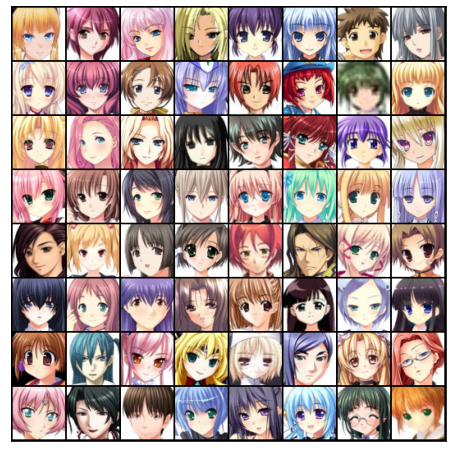

In [18]:
show_batch(train_dl)

In [19]:
class DeviceDataLoader:
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)


In [20]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]

    return data.to(device, non_blocking=True)

def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [21]:
device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)

print(f"Device used: {device}")

Device used: cuda


In [22]:
import torch.nn as nn

In [23]:
latent_size = 128

generator = nn.Sequential(
    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
)


In [24]:
discriminator = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),

    nn.Flatten(),
    nn.Sigmoid()
)

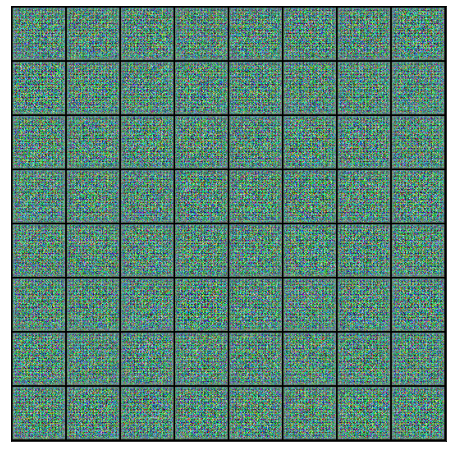

In [25]:
# Convert to device
discriminator = to_device(discriminator, device)

# Generating the fake images
xb = torch.randn(batch_size, latent_size, 1, 1)
fake_images = generator(xb)

# Converting gen to device.
generator = to_device(generator, device)

show_images(fake_images)

In [26]:
out = discriminator(fake_images.cuda())
out.size()

torch.Size([128, 1])

In [27]:
fake_images.size()

torch.Size([128, 3, 64, 64])

In [28]:
import  pytorch_fid_wrapper as pfw

def train_generator(opt_g):
    opt_g.zero_grad()
    
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)
    
    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1, device=device)
    loss = F.binary_cross_entropy(preds, targets)
    
    loss.backward()
    opt_g.step()
  
    return loss.item()

def train_discriminator(real_images, opt_d, epoch):
    opt_d.zero_grad()

    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()
    
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_preds = discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()


    if epoch % 10 == 9 or epoch == 0:

      pfw.set_config(batch_size=50, dims=64, device=device)

      real_m, real_s = pfw.get_stats(real_images)

      fid_score = pfw.fid(fake_images, real_m=real_m, real_s=real_s)

    else:

      fid_score = 0

    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
  
    return loss.item(), real_score, fake_score, fid_score

In [29]:
from torchvision.utils import save_image

sample_dir = 'generated'
os.makedirs(sample_dir, exist_ok=True)

def save_samples(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)

    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))

In [30]:
# TRAINING
fixed_latent = torch.randn(64, latent_size, 1, 1, device=device)

from tqdm.notebook import tqdm
import torch.nn.functional as F

def fit(epochs, lr, start_idx=1):
    torch.cuda.empty_cache()
    
    losses_g, losses_d = [], []
    real_scores, fake_scores = [], []
    fid_scores = []
    
    # Create optimizers
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    
    for epoch in range(epochs):
        for real_images, _ in tqdm(train_dl):
            # Train discriminator
            loss_d, real_score, fake_score, fid_score = train_discriminator(real_images, opt_d, epoch)
            # Train generator
            loss_g = train_generator(opt_g)
            
        # Record losses & scores
        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)
        fid_scores.append(fid_score)
        
        # Log losses & scores (last batch)
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}, fid_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score, fid_score))
    
        # Save generated images
        save_samples(epoch + start_idx, fixed_latent, show=False)
    
    return losses_g, losses_d, real_scores, fake_scores, fid_scores

In [31]:
EPOCHS = 60
LR = 0.001

history = fit(EPOCHS, LR)

  0%|          | 0/497 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth


  0%|          | 0.00/91.2M [00:00<?, ?B/s]

Epoch [1/60], loss_g: 4.6445, loss_d: 1.4806, real_score: 0.6782, fake_score: 0.5521, fid_score: 39.0752
Saving generated-images-0001.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [2/60], loss_g: 3.2526, loss_d: 1.3551, real_score: 0.3670, fake_score: 0.0185, fid_score: 0.0000
Saving generated-images-0002.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [3/60], loss_g: 4.0662, loss_d: 0.4983, real_score: 0.7205, fake_score: 0.0825, fid_score: 0.0000
Saving generated-images-0003.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [4/60], loss_g: 5.9236, loss_d: 0.5689, real_score: 0.8852, fake_score: 0.2924, fid_score: 0.0000
Saving generated-images-0004.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [5/60], loss_g: 8.5504, loss_d: 0.6572, real_score: 0.8923, fake_score: 0.3491, fid_score: 0.0000
Saving generated-images-0005.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [6/60], loss_g: 8.5660, loss_d: 0.5557, real_score: 0.9398, fake_score: 0.3440, fid_score: 0.0000
Saving generated-images-0006.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [7/60], loss_g: 4.0164, loss_d: 0.3193, real_score: 0.8325, fake_score: 0.0808, fid_score: 0.0000
Saving generated-images-0007.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [8/60], loss_g: 7.2341, loss_d: 0.4195, real_score: 0.9122, fake_score: 0.2294, fid_score: 0.0000
Saving generated-images-0008.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [9/60], loss_g: 3.4369, loss_d: 0.2646, real_score: 0.8440, fake_score: 0.0649, fid_score: 0.0000
Saving generated-images-0009.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [10/60], loss_g: 7.0127, loss_d: 0.4486, real_score: 0.8266, fake_score: 0.1571, fid_score: 7.0451
Saving generated-images-0010.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [11/60], loss_g: 4.3602, loss_d: 0.4489, real_score: 0.7666, fake_score: 0.0795, fid_score: 0.0000
Saving generated-images-0011.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [12/60], loss_g: 6.7599, loss_d: 0.4037, real_score: 0.9438, fake_score: 0.2507, fid_score: 0.0000
Saving generated-images-0012.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [13/60], loss_g: 4.2914, loss_d: 0.1459, real_score: 0.9330, fake_score: 0.0593, fid_score: 0.0000
Saving generated-images-0013.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [14/60], loss_g: 4.7117, loss_d: 0.2090, real_score: 0.9430, fake_score: 0.1204, fid_score: 0.0000
Saving generated-images-0014.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [15/60], loss_g: 3.8985, loss_d: 0.1898, real_score: 0.8875, fake_score: 0.0311, fid_score: 0.0000
Saving generated-images-0015.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [16/60], loss_g: 10.9545, loss_d: 1.1583, real_score: 0.9878, fake_score: 0.4723, fid_score: 0.0000
Saving generated-images-0016.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [17/60], loss_g: 4.4268, loss_d: 0.4030, real_score: 0.8515, fake_score: 0.1495, fid_score: 0.0000
Saving generated-images-0017.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [18/60], loss_g: 3.5131, loss_d: 0.3863, real_score: 0.7678, fake_score: 0.0414, fid_score: 0.0000
Saving generated-images-0018.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [19/60], loss_g: 4.2717, loss_d: 0.1669, real_score: 0.9011, fake_score: 0.0362, fid_score: 0.0000
Saving generated-images-0019.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [20/60], loss_g: 5.4249, loss_d: 0.0807, real_score: 0.9552, fake_score: 0.0302, fid_score: 7.4440
Saving generated-images-0020.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [21/60], loss_g: 4.2233, loss_d: 0.0681, real_score: 0.9563, fake_score: 0.0184, fid_score: 0.0000
Saving generated-images-0021.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [22/60], loss_g: 3.9701, loss_d: 0.5270, real_score: 0.7086, fake_score: 0.0338, fid_score: 0.0000
Saving generated-images-0022.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [23/60], loss_g: 5.7394, loss_d: 0.0865, real_score: 0.9382, fake_score: 0.0184, fid_score: 0.0000
Saving generated-images-0023.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [24/60], loss_g: 5.0122, loss_d: 0.1230, real_score: 0.9286, fake_score: 0.0381, fid_score: 0.0000
Saving generated-images-0024.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [25/60], loss_g: 4.3451, loss_d: 0.0973, real_score: 0.9858, fake_score: 0.0741, fid_score: 0.0000
Saving generated-images-0025.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [26/60], loss_g: 4.7126, loss_d: 0.0832, real_score: 0.9620, fake_score: 0.0384, fid_score: 0.0000
Saving generated-images-0026.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [27/60], loss_g: 4.7747, loss_d: 0.1510, real_score: 0.9872, fake_score: 0.1054, fid_score: 0.0000
Saving generated-images-0027.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [28/60], loss_g: 3.5482, loss_d: 0.2521, real_score: 0.8773, fake_score: 0.0765, fid_score: 0.0000
Saving generated-images-0028.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [29/60], loss_g: 5.0116, loss_d: 0.1746, real_score: 0.8724, fake_score: 0.0051, fid_score: 0.0000
Saving generated-images-0029.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [30/60], loss_g: 6.5023, loss_d: 0.4659, real_score: 0.9898, fake_score: 0.2468, fid_score: 7.7108
Saving generated-images-0030.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [31/60], loss_g: 4.1284, loss_d: 0.0692, real_score: 0.9604, fake_score: 0.0242, fid_score: 0.0000
Saving generated-images-0031.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [32/60], loss_g: 4.0308, loss_d: 0.3217, real_score: 0.8147, fake_score: 0.0572, fid_score: 0.0000
Saving generated-images-0032.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [33/60], loss_g: 3.0553, loss_d: 0.1770, real_score: 0.8744, fake_score: 0.0117, fid_score: 0.0000
Saving generated-images-0033.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [34/60], loss_g: 6.9080, loss_d: 0.0374, real_score: 0.9750, fake_score: 0.0107, fid_score: 0.0000
Saving generated-images-0034.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [35/60], loss_g: 5.5383, loss_d: 0.0505, real_score: 0.9839, fake_score: 0.0315, fid_score: 0.0000
Saving generated-images-0035.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [36/60], loss_g: 4.3489, loss_d: 0.0991, real_score: 0.9389, fake_score: 0.0215, fid_score: 0.0000
Saving generated-images-0036.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [37/60], loss_g: 5.3098, loss_d: 0.0690, real_score: 0.9792, fake_score: 0.0309, fid_score: 0.0000
Saving generated-images-0037.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [38/60], loss_g: 4.9347, loss_d: 0.0906, real_score: 0.9595, fake_score: 0.0420, fid_score: 0.0000
Saving generated-images-0038.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [39/60], loss_g: 4.7033, loss_d: 0.1580, real_score: 0.9089, fake_score: 0.0361, fid_score: 0.0000
Saving generated-images-0039.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [40/60], loss_g: 3.9030, loss_d: 0.1607, real_score: 0.8881, fake_score: 0.0167, fid_score: 7.7104
Saving generated-images-0040.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [41/60], loss_g: 5.5994, loss_d: 0.4376, real_score: 0.8375, fake_score: 0.1198, fid_score: 0.0000
Saving generated-images-0041.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [42/60], loss_g: 5.1334, loss_d: 0.0718, real_score: 0.9559, fake_score: 0.0155, fid_score: 0.0000
Saving generated-images-0042.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [43/60], loss_g: 5.8936, loss_d: 0.1274, real_score: 0.9925, fake_score: 0.0839, fid_score: 0.0000
Saving generated-images-0043.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [44/60], loss_g: 5.2982, loss_d: 0.0498, real_score: 0.9734, fake_score: 0.0206, fid_score: 0.0000
Saving generated-images-0044.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [45/60], loss_g: 6.8607, loss_d: 0.0268, real_score: 0.9852, fake_score: 0.0108, fid_score: 0.0000
Saving generated-images-0045.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [46/60], loss_g: 7.4072, loss_d: 0.0779, real_score: 0.9911, fake_score: 0.0577, fid_score: 0.0000
Saving generated-images-0046.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [47/60], loss_g: 6.3519, loss_d: 0.0569, real_score: 0.9837, fake_score: 0.0364, fid_score: 0.0000
Saving generated-images-0047.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [48/60], loss_g: 4.6475, loss_d: 0.1528, real_score: 0.8907, fake_score: 0.0104, fid_score: 0.0000
Saving generated-images-0048.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [49/60], loss_g: 6.2376, loss_d: 0.2371, real_score: 0.9289, fake_score: 0.1077, fid_score: 0.0000
Saving generated-images-0049.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [50/60], loss_g: 5.5343, loss_d: 0.0603, real_score: 0.9787, fake_score: 0.0321, fid_score: 7.3178
Saving generated-images-0050.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [51/60], loss_g: 0.0186, loss_d: 5.1286, real_score: 0.0260, fake_score: 0.0000, fid_score: 0.0000
Saving generated-images-0051.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [52/60], loss_g: 4.8429, loss_d: 0.0298, real_score: 0.9841, fake_score: 0.0129, fid_score: 0.0000
Saving generated-images-0052.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [53/60], loss_g: 4.7696, loss_d: 1.2425, real_score: 0.5477, fake_score: 0.0166, fid_score: 0.0000
Saving generated-images-0053.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [54/60], loss_g: 4.9195, loss_d: 0.0269, real_score: 0.9817, fake_score: 0.0077, fid_score: 0.0000
Saving generated-images-0054.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [55/60], loss_g: 3.8096, loss_d: 0.3730, real_score: 0.8397, fake_score: 0.0681, fid_score: 0.0000
Saving generated-images-0055.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [56/60], loss_g: 5.2292, loss_d: 0.0838, real_score: 0.9393, fake_score: 0.0134, fid_score: 0.0000
Saving generated-images-0056.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [57/60], loss_g: 6.9709, loss_d: 0.0908, real_score: 0.9939, fake_score: 0.0652, fid_score: 0.0000
Saving generated-images-0057.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [58/60], loss_g: 3.9721, loss_d: 0.1363, real_score: 0.9771, fake_score: 0.0861, fid_score: 0.0000
Saving generated-images-0058.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [59/60], loss_g: 5.5439, loss_d: 0.0307, real_score: 0.9835, fake_score: 0.0129, fid_score: 0.0000
Saving generated-images-0059.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [60/60], loss_g: 5.4646, loss_d: 0.0475, real_score: 0.9765, fake_score: 0.0186, fid_score: 8.0855
Saving generated-images-0060.png


In [32]:
import matplotlib.pyplot as plt
losses_g, losses_d, real_scores, fake_scores, fid_scores = history

In [33]:
epochs = [i for i in range(1, EPOCHS + 1)]

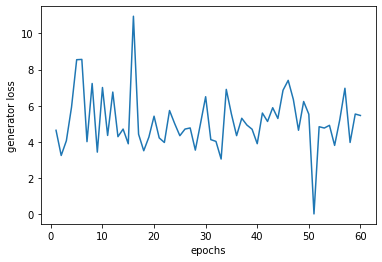

In [34]:
# Ploting the metrics
import matplotlib.pyplot as plt
plt.plot(epochs, losses_g)
plt.xlabel('epochs')
plt.ylabel('generator loss')
plt.show()

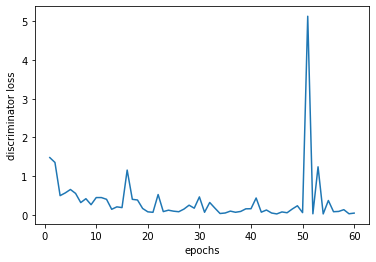

In [35]:
import matplotlib.pyplot as plt
plt.plot(epochs, losses_d)
plt.xlabel('epochs')
plt.ylabel('discriminator loss')
plt.show()

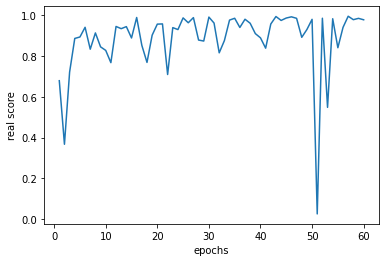

In [36]:
import matplotlib.pyplot as plt
plt.plot(epochs, real_scores)
plt.xlabel('epochs')
plt.ylabel('real score')
plt.show()

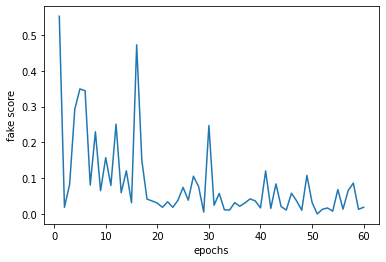

In [37]:
import matplotlib.pyplot as plt
plt.plot(epochs, fake_scores)
plt.xlabel('epochs')
plt.ylabel('fake score')
plt.show()

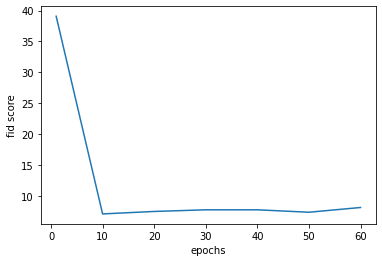

In [38]:
import matplotlib.pyplot as plt
plt.plot([1, 10, 20, 30, 40, 50, 60], [i for i in fid_scores if i != 0])
plt.xlabel('epochs')
plt.ylabel('fid score')
plt.show()

In [39]:
torch.save(generator.state_dict(), "generator_model.bin")
torch.save(discriminator.state_dict(), "discriminator_model.bin")

In [40]:
# Import Image to review the GANs
from IPython.display import Image

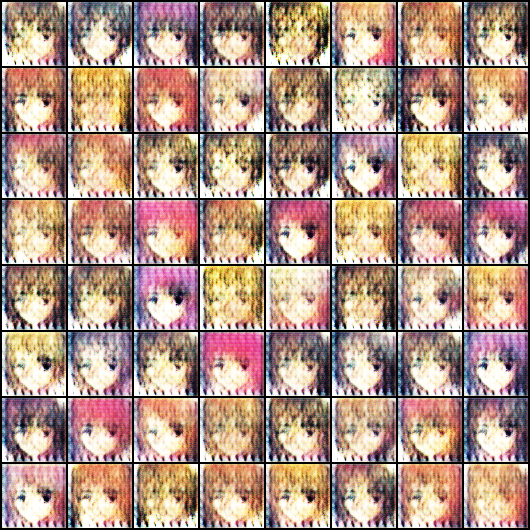

In [41]:
Image('./generated/generated-images-0001.png')

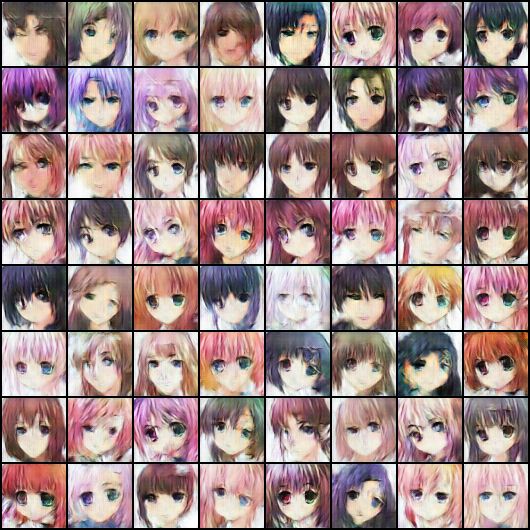

In [42]:
Image('./generated/generated-images-0010.png')

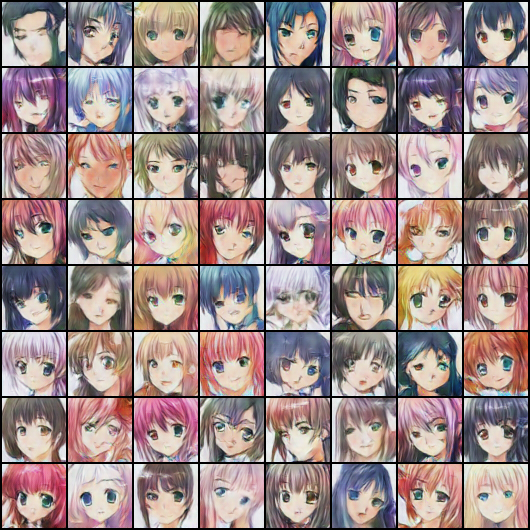

In [43]:
Image('./generated/generated-images-0020.png')

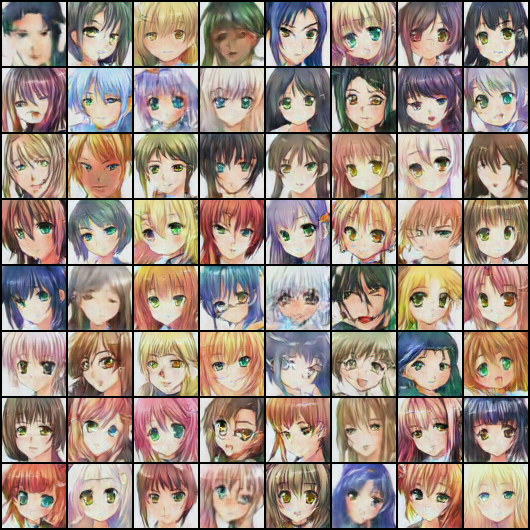

In [44]:
Image('./generated/generated-images-0040.png')

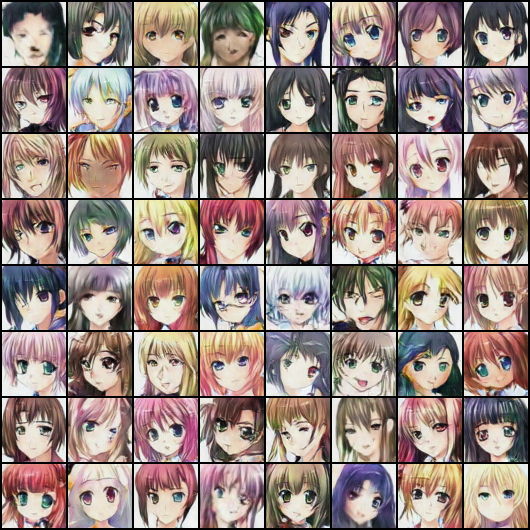

In [45]:
Image('./generated/generated-images-0060.png')

In [47]:
# Recording the frames as video

import cv2
import os

def save_frames_as_video(filename, images_path):
  vid_fname = filename

  files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if images_path in f]
  files.sort()

  out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 1, (530,530))
  [out.write(cv2.imread(fname)) for fname in files]

  out.release()

save_frames_as_video("anime_face_dcgan.avi", "generated")

In [48]:
# Import
import os

import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision.utils import make_grid

%matplotlib inline

In [49]:
# Constants
latent_size = 128
batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [50]:
# Utility methods
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

In [51]:
# Defination of the models and loading of the exported models
discriminator = nn.Sequential(
    # in: 3 x 64 x 64

    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 64 x 32 x 32

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 128 x 16 x 16

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 256 x 8 x 8

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 x 4 x 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    # out: 1 x 1 x 1

    nn.Flatten(),
    nn.Sigmoid()
)

generator = nn.Sequential(
    # in: latent_size x 1 x 1

    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 x 32 x 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # out: 3 x 64 x 64
)

# Load the Saved models
generator.load_state_dict(torch.load("generator_model.bin", map_location=torch.device('cpu')))
discriminator.load_state_dict(torch.load("discriminator_model.bin", map_location=torch.device('cpu')))

# Evaluation
generator.eval()
discriminator.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): LeakyReLU(negative_slope=0.2, inplace=True)
  (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): LeakyReLU(negative_slope=0.2, inplace=True)
  (6): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): LeakyReLU(negative_slope=0.2, inplace=True)
  (9): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (10): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): LeakyReLU(negative_slope=0.2, inplace=True)
  (12): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (13): Flatten(s

In [52]:
# Method needed for generating, and saving images
from torchvision.utils import save_image

sample_dir = 'test_generated'
os.makedirs(sample_dir, exist_ok=True)

def save_samples(index, show=True):
    latent_tensors = torch.randn(64, latent_size, 1, 1, device=torch.device('cpu'))

    fake_images = generator(latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)

    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)

    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))

In [53]:
def generate_and_show_random_image():
    xb = torch.randn(batch_size, latent_size, 1, 1) # random latent tensors
    fake_images = generator(xb)

    show_images(fake_images)

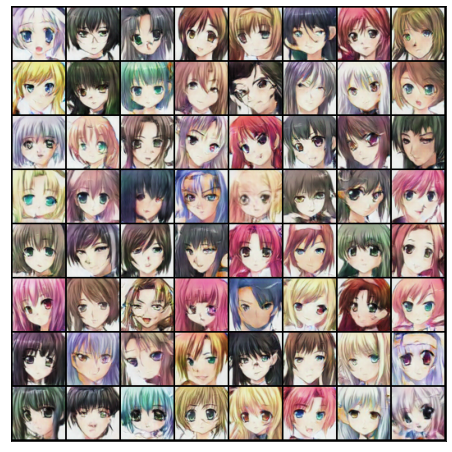

In [54]:
# Test generation
generate_and_show_random_image()

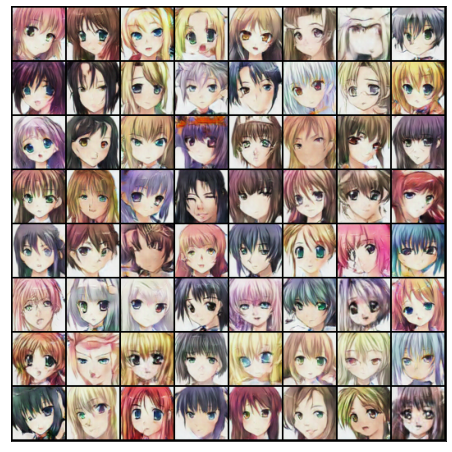

In [55]:
generate_and_show_random_image()

In [56]:
for epoch in range(20):
  save_samples(epoch + 1, show=False)

Saving generated-images-0001.png
Saving generated-images-0002.png
Saving generated-images-0003.png
Saving generated-images-0004.png
Saving generated-images-0005.png
Saving generated-images-0006.png
Saving generated-images-0007.png
Saving generated-images-0008.png
Saving generated-images-0009.png
Saving generated-images-0010.png
Saving generated-images-0011.png
Saving generated-images-0012.png
Saving generated-images-0013.png
Saving generated-images-0014.png
Saving generated-images-0015.png
Saving generated-images-0016.png
Saving generated-images-0017.png
Saving generated-images-0018.png
Saving generated-images-0019.png
Saving generated-images-0020.png


In [57]:
def generate_video(generated_location, save_filename):
    files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if generated_location in f]
    files.sort()

    out = cv2.VideoWriter(save_filename, cv2.VideoWriter_fourcc(*'MP4V'), 1, (530,530))
    [out.write(cv2.imread(fname)) for fname in files]
    out.release()

    print("Done, Exported as {}".format(save_filename))

In [58]:
generate_video("generated", "exported_model_generation.avi")

Done, Exported as exported_model_generation.avi
